In [4]:
# Load libraries
import Imputation
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn import metrics
import plotly.figure_factory as ff

# Data Collection

In [5]:
#read in the data csv file

#This dataset contains comprehensive taxi data for each trip taken in Chicago

'''
data = pd.read_csv('Taxi_Trips.csv', nrows= 1500)
data_sample = data.head(1500)
data.head()
'''
data = pd.read_csv('Taxi_Trips_sample.csv', nrows= 100000)
data.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,63af0966750b55c100bc6d70dc866cab850cc6c3,3cd113f8fbc0bde853a72d5f5b6d84ff2da07e7236de34...,11/01/2015 10:45:00 PM,11/01/2015 11:15:00 PM,1680.0,1.2,1.703198e+10,1.703132e+10,76.0,32.0,...,3.0,44.45,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,736decc0eb959c4376bf3283967da3082da6bc46,6027026bae159d4f0f8f0e3eaab1abeeb1d23f6311fbe9...,07/11/2015 02:15:00 AM,07/11/2015 02:30:00 AM,420.0,0.0,1.703183e+10,1.703108e+10,28.0,8.0,...,2.0,12.45,Credit Card,Taxi Affiliation Services,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
2,8d0c15ba5b45aebeb7a47d8a301c3dbad2e8804b,ccaaaf4dc9e99d67f39288d32739d7e870e321c878dd7a...,07/05/2015 12:45:00 PM,07/05/2015 01:15:00 PM,2100.0,0.8,1.703198e+10,1.703108e+10,56.0,8.0,...,3.0,40.35,Credit Card,Blue Ribbon Taxi Association Inc.,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
3,cafdd08d5ede8d88d288b816b8c16266ae153b76,83946c2d33e0cac34a4d8a03a8bdca905808e852e16727...,11/07/2015 04:30:00 PM,11/07/2015 04:30:00 PM,720.0,1.1,1.703132e+10,1.703108e+10,32.0,8.0,...,1.0,8.65,Cash,Dispatch Taxi Affiliation,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259)
4,769b8f072e27a593a948bab845a4b69b24afd693,e0f0dfba8628846b3c4022833a14ce311c40ac2408a325...,07/04/2015 02:45:00 PM,07/04/2015 03:00:00 PM,540.0,0.0,1.703184e+10,1.703183e+10,32.0,28.0,...,1.0,8.65,Cash,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)


In [6]:
numpy.size(data)

2300000

# Data Preparation

In [7]:
#Drop non-relevant data, keep predictors
relevant_data = data.drop(['Trip ID','Taxi ID','Pickup Census Tract','Dropoff Census Tract','Pickup Centroid Latitude',
                           'Pickup Centroid Longitude','Pickup Centroid Location','Dropoff Centroid Latitude',
                          'Dropoff Centroid Longitude','Dropoff Centroid  Location'], axis = 1)
#pd.options.display.max_rows = 500
relevant_data.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company
0,11/01/2015 10:45:00 PM,11/01/2015 11:15:00 PM,1680.0,1.2,76.0,32.0,39.45,2.0,0.0,3.0,44.45,Credit Card,Taxi Affiliation Services
1,07/11/2015 02:15:00 AM,07/11/2015 02:30:00 AM,420.0,0.0,28.0,8.0,6.45,4.0,0.0,2.0,12.45,Credit Card,Taxi Affiliation Services
2,07/05/2015 12:45:00 PM,07/05/2015 01:15:00 PM,2100.0,0.8,56.0,8.0,30.65,6.7,0.0,3.0,40.35,Credit Card,Blue Ribbon Taxi Association Inc.
3,11/07/2015 04:30:00 PM,11/07/2015 04:30:00 PM,720.0,1.1,32.0,8.0,7.65,0.0,0.0,1.0,8.65,Cash,Dispatch Taxi Affiliation
4,07/04/2015 02:45:00 PM,07/04/2015 03:00:00 PM,540.0,0.0,32.0,28.0,7.65,0.0,0.0,1.0,8.65,Cash,Blue Ribbon Taxi Association Inc.


In [8]:
relevant_data['Trip Start Date'] = pd.to_datetime(relevant_data['Trip Start Timestamp']).dt.date
relevant_data['Season'] = pd.DatetimeIndex(relevant_data['Trip Start Date']).month
relevant_data['Trip Start Time'] = pd.to_datetime(relevant_data['Trip Start Timestamp']).dt.hour

relevant_data['Season'] = relevant_data['Season'].replace(dict.fromkeys([3,4,5], 'Spring'))
relevant_data['Season'] = relevant_data['Season'].replace(dict.fromkeys([6,7,8], 'Summer'))
relevant_data['Season'] = relevant_data['Season'].replace(dict.fromkeys([9,10,11], 'Fall'))
relevant_data['Season'] = relevant_data['Season'].replace(dict.fromkeys([1,2,12], 'Winter'))

relevant_data['Trip Start Time'] = relevant_data['Trip Start Time'].replace(dict.fromkeys(range(6,13), 'Morning'))
relevant_data['Trip Start Time'] = relevant_data['Trip Start Time'].replace(dict.fromkeys(range(13,18), 'Afternoon'))
relevant_data['Trip Start Time'] = relevant_data['Trip Start Time'].replace(dict.fromkeys(range(18,22), 'Evening'))
relevant_data['Trip Start Time'] = relevant_data['Trip Start Time'].replace(dict.fromkeys([0,1,2,3,4,5,22,23,24], 'Night'))

In [9]:
relevant_data = relevant_data.drop(['Trip Start Timestamp', 'Trip End Timestamp','Trip Start Date'], axis=1)
relevant_data.head()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Season,Trip Start Time
0,1680.0,1.2,76.0,32.0,39.45,2.0,0.0,3.0,44.45,Credit Card,Taxi Affiliation Services,Fall,Night
1,420.0,0.0,28.0,8.0,6.45,4.0,0.0,2.0,12.45,Credit Card,Taxi Affiliation Services,Summer,Night
2,2100.0,0.8,56.0,8.0,30.65,6.7,0.0,3.0,40.35,Credit Card,Blue Ribbon Taxi Association Inc.,Summer,Morning
3,720.0,1.1,32.0,8.0,7.65,0.0,0.0,1.0,8.65,Cash,Dispatch Taxi Affiliation,Fall,Afternoon
4,540.0,0.0,32.0,28.0,7.65,0.0,0.0,1.0,8.65,Cash,Blue Ribbon Taxi Association Inc.,Summer,Afternoon


In [10]:
missing_val_count_by_column = (relevant_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(relevant_data['Company'].nunique())
print(relevant_data['Payment Type'].nunique())

Trip Seconds                46
Pickup Community Area        3
Dropoff Community Area    3062
Fare                         2
Tips                         2
Tolls                       45
Extras                       2
Trip Total                   2
Company                    469
dtype: int64
49
7


In [11]:
'''
relevant_data = relevant_data.dropna()
missing_val_count_by_column = (relevant_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(relevant_data.shape)
'''

'\nrelevant_data = relevant_data.dropna()\nmissing_val_count_by_column = (relevant_data.isnull().sum())\nprint(missing_val_count_by_column[missing_val_count_by_column > 0])\nprint(relevant_data.shape)\n'

In [12]:
# Imputation of missing data
Z = pd.DataFrame(relevant_data)
xt_update = Imputation.DataFrameImputer().fit_transform(Z)
print(relevant_data.shape)

(100000, 13)


In [13]:
threshold = 1000 # Anything that occurs less than this will be replaced.
value_counts = xt_update['Company'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
xt_update['Company'].replace(to_replace = to_remove, value = "other", inplace=True)
print(xt_update["Company"].value_counts())

Taxi Affiliation Services            52940
Dispatch Taxi Affiliation            14265
Blue Ribbon Taxi Association Inc.    10722
Choice Taxi Association               9061
Northwest Management LLC              5211
KOAM Taxi Association                 3010
other                                 2667
Top Cab Affiliation                   2124
Name: Company, dtype: int64


In [14]:
threshold = 700 # Anything that occurs less than this will be replaced.
value_counts = xt_update['Payment Type'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
xt_update['Payment Type'].replace(to_replace = to_remove, value = "other", inplace=True)
print(xt_update['Payment Type'].value_counts())

Cash           60790
Credit Card    38205
other           1005
Name: Payment Type, dtype: int64


Mapping based on the following map

<img src="Map_of_the_Community_Areas_and_'Sides'_of_the_City_of_Chicago_2.png">

In [15]:
xt_update['Pickup Community Area'][xt_update['Pickup Community Area'] == 76] = "O'Hare"  
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys([8,32,33], 'Central'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys(range(23,32), 'West Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys([1,2,3,4,9,10,11,12,13,14,77], 'Far Noth Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys(range(15,21), 'Northwest Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys([5,6,7,21,22], 'North Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys([34,35,36,37,38,39,40,41,42,43,60,69], 'South Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys([56,57,58,59,61,62,63,64,65,66,67,68], 'Southwest Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys(range(70,76), 'Far Southwest Side'))
xt_update['Pickup Community Area'] = xt_update['Pickup Community Area'].replace(dict.fromkeys(range(44,56), 'Far Southeast Side'))

xt_update['Dropoff Community Area'][xt_update['Dropoff Community Area'] == 76] = "O'Hare"  
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys([8,32,33], 'Central'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys(range(23,32), 'West Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys([1,2,3,4,9,10,11,12,13,14,77], 'Far Noth Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys(range(15,21), 'Northwest Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys([5,6,7,21,22], 'North Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys([34,35,36,37,38,39,40,41,42,43,60,69], 'South Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys([56,57,58,59,61,62,63,64,65,66,67,68], 'Southwest Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys(range(70,76), 'Far Southwest Side'))
xt_update['Dropoff Community Area'] = xt_update['Dropoff Community Area'].replace(dict.fromkeys(range(44,56), 'Far Southeast Side'))
print(xt_update["Pickup Community Area"].value_counts())
print(xt_update["Dropoff Community Area"].value_counts())

Central               59017
North Side            13653
West Side             12187
O'Hare                 6804
Far Noth Side          4132
Southwest Side         2408
South Side             1200
Northwest Side          495
Far Southeast Side       67
Far Southwest Side       37
Name: Pickup Community Area, dtype: int64
Central               51567
North Side            16525
West Side             14705
Far Noth Side          5468
Northwest Side         3996
O'Hare                 3898
South Side             1891
Southwest Side         1762
Far Southeast Side      110
Far Southwest Side       78
Name: Dropoff Community Area, dtype: int64


In [16]:
threshold = 1800 # Anything that occurs less than this will be removed.
value_counts = xt_update["Pickup Community Area"].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
xt_update["Pickup Community Area"].replace(to_replace = to_remove, value = "Other Areas", inplace=True)

threshold = 1800 # Anything that occurs less than this will be removed.
value_counts = xt_update["Dropoff Community Area"].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
xt_update["Dropoff Community Area"].replace(to_replace = to_remove, value = "Other Areas", inplace=True)

print(xt_update["Pickup Community Area"].value_counts())
print(xt_update["Dropoff Community Area"].value_counts())

Central           59017
North Side        13653
West Side         12187
O'Hare             6804
Far Noth Side      4132
Southwest Side     2408
Other Areas        1799
Name: Pickup Community Area, dtype: int64
Central           51567
North Side        16525
West Side         14705
Far Noth Side      5468
Northwest Side     3996
O'Hare             3898
Other Areas        1950
South Side         1891
Name: Dropoff Community Area, dtype: int64


In [17]:
data_visual = xt_update.copy()
data_decisionTree = xt_update.copy()
'''
scaler = MinMaxScaler()
xt_update[['Trip Seconds','Trip Miles','Fare','Tolls','Extras','Trip Total']] = scaler.fit_transform(xt_update[['Trip Seconds','Trip Miles','Fare','Tolls','Extras','Trip Total']])
xt_update.head()
'''
data_visual.head()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Season,Trip Start Time
0,1680.0,1.2,O'Hare,Central,39.45,2.0,0.0,3.0,44.45,Credit Card,Taxi Affiliation Services,Fall,Night
1,420.0,0.0,West Side,Central,6.45,4.0,0.0,2.0,12.45,Credit Card,Taxi Affiliation Services,Summer,Night
2,2100.0,0.8,Southwest Side,Central,30.65,6.7,0.0,3.0,40.35,Credit Card,Blue Ribbon Taxi Association Inc.,Summer,Morning
3,720.0,1.1,Central,Central,7.65,0.0,0.0,1.0,8.65,Cash,Dispatch Taxi Affiliation,Fall,Afternoon
4,540.0,0.0,Central,West Side,7.65,0.0,0.0,1.0,8.65,Cash,Blue Ribbon Taxi Association Inc.,Summer,Afternoon


In [18]:
# One hot encoding
data_visual = pd.get_dummies(data_visual, columns=['Pickup Community Area','Dropoff Community Area','Payment Type', 'Company','Season','Trip Start Time'])
data_regression = pd.get_dummies(xt_update, columns=['Pickup Community Area','Dropoff Community Area','Payment Type', 'Company','Season','Trip Start Time'])
pd.options.display.max_columns = 50
data_regression.head()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Community Area_Central,Pickup Community Area_Far Noth Side,Pickup Community Area_North Side,Pickup Community Area_O'Hare,Pickup Community Area_Other Areas,Pickup Community Area_Southwest Side,Pickup Community Area_West Side,Dropoff Community Area_Central,Dropoff Community Area_Far Noth Side,Dropoff Community Area_North Side,Dropoff Community Area_Northwest Side,Dropoff Community Area_O'Hare,Dropoff Community Area_Other Areas,Dropoff Community Area_South Side,Dropoff Community Area_West Side,Payment Type_Cash,Payment Type_Credit Card,Payment Type_other,Company_Blue Ribbon Taxi Association Inc.,Company_Choice Taxi Association,Company_Dispatch Taxi Affiliation,Company_KOAM Taxi Association,Company_Northwest Management LLC,Company_Taxi Affiliation Services,Company_Top Cab Affiliation,Company_other,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Trip Start Time_Afternoon,Trip Start Time_Evening,Trip Start Time_Morning,Trip Start Time_Night
0,1680.0,1.2,39.45,2.0,0.0,3.0,44.45,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,420.0,0.0,6.45,4.0,0.0,2.0,12.45,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,2100.0,0.8,30.65,6.7,0.0,3.0,40.35,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,720.0,1.1,7.65,0.0,0.0,1.0,8.65,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,540.0,0.0,7.65,0.0,0.0,1.0,8.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [19]:
data_regression["Tips"].describe()

count    100000.000000
mean          1.258869
std           2.323212
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          50.000000
Name: Tips, dtype: float64

In [20]:
data_classification = data_regression.copy() 
criteria = [data_classification["Tips"].between(0, 0), data_classification["Tips"].between(0.0000001, 10), data_classification["Tips"].between(10, 30)]
values = [0, 1, 2]
data_classification["Tips"] = numpy.select(criteria, values, 0)

criteria = [data_visual["Tips"].between(0, 0), data_visual["Tips"].between(0.0000001, 10), data_visual["Tips"].between(10, 30)]
values = [0, 1, 2]
data_visual["Tips"] = numpy.select(criteria, values, 0)

new = data_classification.drop(['Tips','Trip Total'], axis=1)
new.head()

,Trip Seconds,Trip Miles,Fare,Tolls,Extras,Pickup Community Area_Central,Pickup Community Area_Far Noth Side,Pickup Community Area_North Side,Pickup Community Area_O'Hare,Pickup Community Area_Other Areas,Pickup Community Area_Southwest Side,Pickup Community Area_West Side,Dropoff Community Area_Central,Dropoff Community Area_Far Noth Side,Dropoff Community Area_North Side,Dropoff Community Area_Northwest Side,Dropoff Community Area_O'Hare,Dropoff Community Area_Other Areas,Dropoff Community Area_South Side,Dropoff Community Area_West Side,Payment Type_Cash,Payment Type_Credit Card,Payment Type_other,Company_Blue Ribbon Taxi Association Inc.,Company_Choice Taxi Association,Company_Dispatch Taxi Affiliation,Company_KOAM Taxi Association,Company_Northwest Management LLC,Company_Taxi Affiliation Services,Company_Top Cab Affiliation,Company_other,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Trip Start Time_Afternoon,Trip Start Time_Evening,Trip Start Time_Morning,Trip Start Time_Night
0,1680.0,1.2,39.45,0.0,3.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,420.0,0.0,6.45,0.0,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,2100.0,0.8,30.65,0.0,3.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,720.0,1.1,7.65,0.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,540.0,0.0,7.65,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


# Data Exploration

In [21]:
data_visual['Tips'].value_counts()

0    63201
1    36086
2      713
Name: Tips, dtype: int64

In [22]:
data_visual[data_visual['Tips'] == 0].describe()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Community Area_Central,Pickup Community Area_Far Noth Side,Pickup Community Area_North Side,Pickup Community Area_O'Hare,Pickup Community Area_Other Areas,Pickup Community Area_Southwest Side,Pickup Community Area_West Side,Dropoff Community Area_Central,Dropoff Community Area_Far Noth Side,Dropoff Community Area_North Side,Dropoff Community Area_Northwest Side,Dropoff Community Area_O'Hare,Dropoff Community Area_Other Areas,Dropoff Community Area_South Side,Dropoff Community Area_West Side,Payment Type_Cash,Payment Type_Credit Card,Payment Type_other,Company_Blue Ribbon Taxi Association Inc.,Company_Choice Taxi Association,Company_Dispatch Taxi Affiliation,Company_KOAM Taxi Association,Company_Northwest Management LLC,Company_Taxi Affiliation Services,Company_Top Cab Affiliation,Company_other,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Trip Start Time_Afternoon,Trip Start Time_Evening,Trip Start Time_Morning,Trip Start Time_Night
count,63201.000000,63201.000000,63201.000000,63201.0,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000,63201.000000
mean,730.134855,2.171302,10.713872,0.0,0.000956,0.873076,11.600575,0.588044,0.051012,0.144491,0.045537,0.022215,0.017041,0.131659,0.523409,0.061898,0.154887,0.040664,0.031329,0.018006,0.021297,0.148510,0.961836,0.023449,0.014715,0.106596,0.084619,0.140995,0.028987,0.052151,0.531764,0.023496,0.031392,0.211278,0.000775,0.787931,0.000016,0.272765,0.227053,0.236246,0.263936
std,703.948953,5.958502,9.280511,0.0,0.052679,8.257199,12.981884,0.492191,0.220024,0.351590,0.208481,0.147383,0.129425,0.338123,0.499456,0.240972,0.361800,0.197512,0.174206,0.132974,0.144374,0.355608,0.191593,0.151326,0.120410,0.308602,0.278316,0.348019,0.167771,0.222333,0.498994,0.151475,0.174376,0.408219,0.027834,0.408777,0.003978,0.445384,0.418931,0.424779,0.440768
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,360.000000,0.000000,5.650000,0.0,0.000000,0.000000,6.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,540.000000,0.800000,7.650000,0.0,0.000000,0.000000,8.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,900.000000,2.100000,11.450000,0.0,0.000000,1.000000,12.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,49620.000000,751.100000,331.250000,0.0,6.000000,1111.110000,1123.360000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

In [23]:
data_visual[data_visual['Tips'] == 1].describe()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Community Area_Central,Pickup Community Area_Far Noth Side,Pickup Community Area_North Side,Pickup Community Area_O'Hare,Pickup Community Area_Other Areas,Pickup Community Area_Southwest Side,Pickup Community Area_West Side,Dropoff Community Area_Central,Dropoff Community Area_Far Noth Side,Dropoff Community Area_North Side,Dropoff Community Area_Northwest Side,Dropoff Community Area_O'Hare,Dropoff Community Area_Other Areas,Dropoff Community Area_South Side,Dropoff Community Area_West Side,Payment Type_Cash,Payment Type_Credit Card,Payment Type_other,Company_Blue Ribbon Taxi Association Inc.,Company_Choice Taxi Association,Company_Dispatch Taxi Affiliation,Company_KOAM Taxi Association,Company_Northwest Management LLC,Company_Taxi Affiliation Services,Company_Top Cab Affiliation,Company_other,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Trip Start Time_Afternoon,Trip Start Time_Evening,Trip Start Time_Morning,Trip Start Time_Night
count,36086.000000,36086.000000,36086.000000,36086.0,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.000000,36086.0,36086.000000,36086.000000,36086.000000,36086.000000
mean,929.599013,3.377484,13.852362,1.0,0.001848,1.064961,18.132281,0.600067,0.024940,0.124508,0.098487,0.010503,0.034861,0.106634,0.507427,0.042648,0.186056,0.032533,0.048274,0.021837,0.014549,0.146677,0.000028,0.997894,0.002078,0.108241,0.100399,0.146151,0.032007,0.052098,0.525051,0.017403,0.018650,0.237599,0.000693,0.761708,0.0,0.258743,0.240758,0.236158,0.264341
std,741.199487,5.524345,10.779148,0.0,0.073794,2.694368,13.850443,0.489891,0.155946,0.330165,0.297976,0.101944,0.183431,0.308652,0.499952,0.202065,0.389157,0.177414,0.214347,0.146152,0.119739,0.353789,0.005264,0.045844,0.045542,0.310689,0.300535,0.353262,0.176021,0.222227,0.499379,0.130769,0.135287,0.425618,0.026312,0.426044,0.0,0.437950,0.427550,0.424726,0.440988
min,0.000000,0.000000,0.010000,1.0,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,420.000000,0.100000,6.450000,1.0,0.000000,0.000000,9.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,660.000000,1.100000,9.050000,1.0,0.000000,0.000000,11.850000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1200.000000,3.300000,16.450000,1.0,0.000000,1.500000,20.650000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,5520.000000,183.600000,97.450000,1.0,5.550000,99.500000,202.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [24]:
data_visual[data_visual['Tips'] == 2].describe()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Community Area_Central,Pickup Community Area_Far Noth Side,Pickup Community Area_North Side,Pickup Community Area_O'Hare,Pickup Community Area_Other Areas,Pickup Community Area_Southwest Side,Pickup Community Area_West Side,Dropoff Community Area_Central,Dropoff Community Area_Far Noth Side,Dropoff Community Area_North Side,Dropoff Community Area_Northwest Side,Dropoff Community Area_O'Hare,Dropoff Community Area_Other Areas,Dropoff Community Area_South Side,Dropoff Community Area_West Side,Payment Type_Cash,Payment Type_Credit Card,Payment Type_other,Company_Blue Ribbon Taxi Association Inc.,Company_Choice Taxi Association,Company_Dispatch Taxi Affiliation,Company_KOAM Taxi Association,Company_Northwest Management LLC,Company_Taxi Affiliation Services,Company_Top Cab Affiliation,Company_other,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Trip Start Time_Afternoon,Trip Start Time_Evening,Trip Start Time_Morning,Trip Start Time_Night
count,713.000000,713.000000,713.000000,713.0,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.0,713.0,713.0,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.0,713.000000,713.0,713.000000,713.000000,713.000000,713.000000
mean,2509.985975,13.085288,40.867447,2.0,0.041164,8.723604,62.452090,0.277700,0.011220,0.039271,0.521739,0.022440,0.102384,0.025245,0.246844,0.023843,0.030856,0.353436,0.246844,0.033661,0.028050,0.036466,0.0,1.0,0.0,0.110799,0.126227,0.112202,0.032258,0.049088,0.539972,0.015428,0.014025,0.225806,0.0,0.774194,0.0,0.356241,0.218794,0.244039,0.180926
std,1046.747303,11.165643,11.590414,0.0,0.340118,10.773607,19.423649,0.448179,0.105403,0.194375,0.499878,0.148215,0.303366,0.156980,0.431478,0.152667,0.173048,0.478372,0.431478,0.180481,0.165233,0.187577,0.0,0.0,0.0,0.314104,0.332338,0.315836,0.176809,0.216204,0.498750,0.123333,0.117677,0.418406,0.0,0.418406,0.0,0.479224,0.413719,0.429818,0.385227
min,0.000000,0.000000,3.250000,2.0,0.000000,0.000000,17.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1740.000000,1.100000,35.650000,2.0,0.000000,2.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2400.000000,16.700000,38.650000,2.0,0.000000,3.000000,55.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,3180.000000,18.500000,44.450000,2.0,0.000000,18.000000,69.400000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,1.000000,0.000000,0.000000,0.000000
max,7320.000000,129.700000,96.050000,2.0,4.000000,62.500000,180.050000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


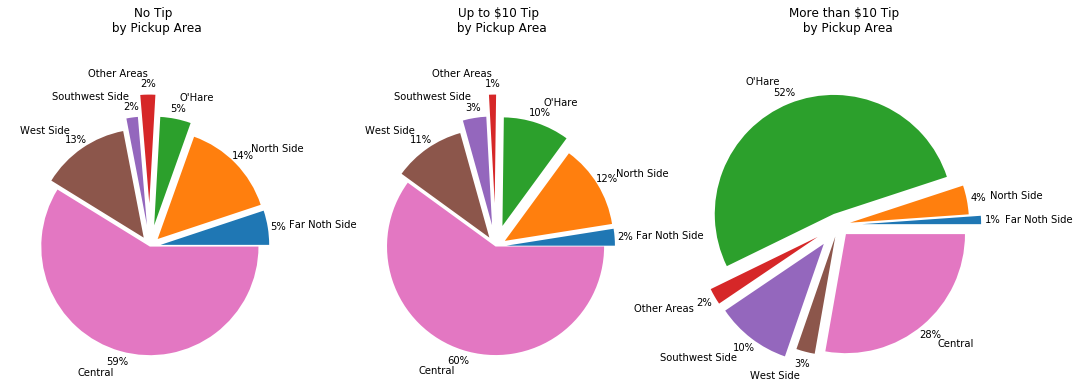

In [25]:
fig = plt.figure(figsize=[8, 8])
a = data_visual[data_visual['Tips'] == 0]['Pickup Community Area_Far Noth Side'].mean()
b = data_visual[data_visual['Tips'] == 0]['Pickup Community Area_North Side'].mean()
c = data_visual[data_visual['Tips'] == 0]["Pickup Community Area_O'Hare"].mean()
d = data_visual[data_visual['Tips'] == 0]['Pickup Community Area_Other Areas'].mean()
e = data_visual[data_visual['Tips'] == 0]["Pickup Community Area_Southwest Side"].mean()
f = data_visual[data_visual['Tips'] == 0]['Pickup Community Area_West Side'].mean()
g = data_visual[data_visual['Tips'] == 0]['Pickup Community Area_Central'].mean()

plt1 = fig.add_axes([0, 0, .5, .5], aspect=1)

label = ['Far Noth Side', 'North Side', "O'Hare", 'Other Areas','Southwest Side','West Side', 'Central']
explode = (0.1, 0.1, 0.2, 0.4, 0.2, 0.1, 0)
plt1.pie([a, b, c, d, e, f, g], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt1.set_title('No Tip \n by Pickup Area', pad=50)
plt1.axis('equal')



h = data_visual[data_visual['Tips'] == 1]['Pickup Community Area_Far Noth Side'].mean()
i = data_visual[data_visual['Tips'] == 1]['Pickup Community Area_North Side'].mean()
j = data_visual[data_visual['Tips'] == 1]["Pickup Community Area_O'Hare"].mean()
k = data_visual[data_visual['Tips'] == 1]['Pickup Community Area_Other Areas'].mean()
l = data_visual[data_visual['Tips'] == 1]["Pickup Community Area_Southwest Side"].mean()
m = data_visual[data_visual['Tips'] == 1]['Pickup Community Area_West Side'].mean()
n = data_visual[data_visual['Tips'] == 1]['Pickup Community Area_Central'].mean()

plt2 = fig.add_axes([0.6, 0, .5, .5], aspect=1)

label = ['Far Noth Side', 'North Side', "O'Hare", 'Other Areas','Southwest Side','West Side', 'Central']
explode = (0.1, 0.1, 0.2, 0.4, 0.2, 0.1, 0)
plt2.pie([h, i, j, k, l, m, n], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt2.set_title('Up to $10 Tip \n by Pickup Area', pad=50)
plt2.axis('equal')


o = data_visual[data_visual['Tips'] == 2]['Pickup Community Area_Far Noth Side'].mean()
p = data_visual[data_visual['Tips'] == 2]['Pickup Community Area_North Side'].mean()
q = data_visual[data_visual['Tips'] == 2]["Pickup Community Area_O'Hare"].mean()
r = data_visual[data_visual['Tips'] == 2]['Pickup Community Area_Other Areas'].mean()
s = data_visual[data_visual['Tips'] == 2]["Pickup Community Area_Southwest Side"].mean()
t = data_visual[data_visual['Tips'] == 2]['Pickup Community Area_West Side'].mean()
u = data_visual[data_visual['Tips'] == 2]['Pickup Community Area_Central'].mean()

plt3 = fig.add_axes([1.2, 0, .5, .5], aspect=1)

label = ['Far Noth Side', 'North Side', "O'Hare", 'Other Areas','Southwest Side','West Side', 'Central']
explode = (0.2, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1)
plt3.pie([o,p,q,r,s,t,u], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt3.set_title('More than $10 Tip \n by Pickup Area', pad=50)
plt3.axis('equal')

fig.savefig("p1.png", bbox_inches='tight')

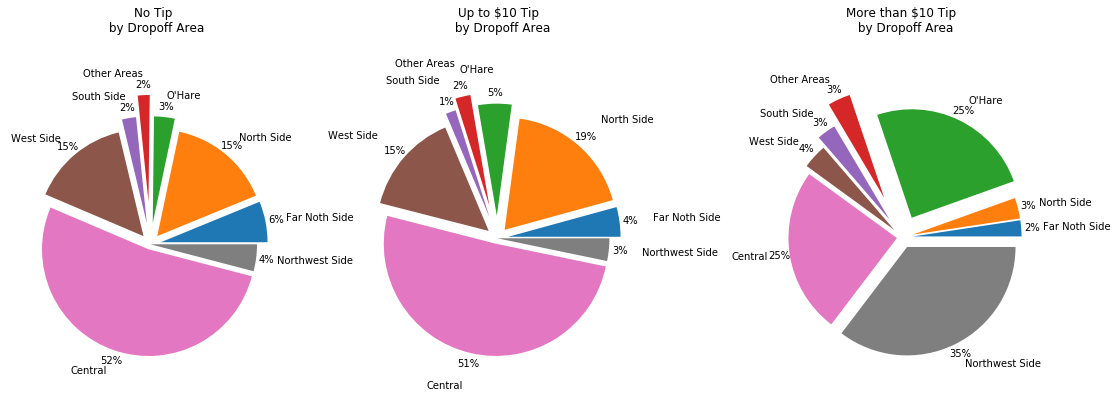

In [26]:
fig = plt.figure(figsize=[8, 8])
a = data_visual[data_visual['Tips'] == 0]['Dropoff Community Area_Far Noth Side'].mean()
b = data_visual[data_visual['Tips'] == 0]['Dropoff Community Area_North Side'].mean()
c = data_visual[data_visual['Tips'] == 0]["Dropoff Community Area_O'Hare"].mean()
d = data_visual[data_visual['Tips'] == 0]['Dropoff Community Area_Other Areas'].mean()
e = data_visual[data_visual['Tips'] == 0]["Dropoff Community Area_South Side"].mean()
f = data_visual[data_visual['Tips'] == 0]['Dropoff Community Area_West Side'].mean()
g = data_visual[data_visual['Tips'] == 0]['Dropoff Community Area_Central'].mean()
h = data_visual[data_visual['Tips'] == 0]['Dropoff Community Area_Northwest Side'].mean()

plt1 = fig.add_axes([0, 0, .5, .5], aspect=1)

label = ['Far Noth Side', 'North Side', "O'Hare", 'Other Areas','South Side','West Side', 'Central','Northwest Side']
explode = (0.1, 0.1, 0.2, 0.4, 0.2, 0.1, 0.05, 0)
plt1.pie([a, b, c, d, e, f, g,h], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt1.set_title('No Tip \n by Dropoff Area', pad=50)
plt1.axis('equal')



i = data_visual[data_visual['Tips'] == 1]['Dropoff Community Area_Far Noth Side'].mean()
j = data_visual[data_visual['Tips'] == 1]['Dropoff Community Area_North Side'].mean()
k = data_visual[data_visual['Tips'] == 1]["Dropoff Community Area_O'Hare"].mean()
l = data_visual[data_visual['Tips'] == 1]['Dropoff Community Area_Other Areas'].mean()
m = data_visual[data_visual['Tips'] == 1]["Dropoff Community Area_South Side"].mean()
n = data_visual[data_visual['Tips'] == 1]['Dropoff Community Area_West Side'].mean()
o = data_visual[data_visual['Tips'] == 1]['Dropoff Community Area_Central'].mean()
p = data_visual[data_visual['Tips'] == 1]['Dropoff Community Area_Northwest Side'].mean()

plt2 = fig.add_axes([0.6, 0, .5, .5], aspect=1)

label = ['Far Noth Side', 'North Side', "O'Hare", 'Other Areas','South Side','West Side', 'Central','Northwest Side']
explode = (0.1, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05, 0)
plt2.pie([i, j, k, l, m, n, o, p], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.3)
plt2.set_title('Up to $10 Tip \n by Dropoff Area', pad=50)
plt2.axis('equal')


q = data_visual[data_visual['Tips'] == 2]['Dropoff Community Area_Far Noth Side'].mean()
r = data_visual[data_visual['Tips'] == 2]['Dropoff Community Area_North Side'].mean()
s = data_visual[data_visual['Tips'] == 2]["Dropoff Community Area_O'Hare"].mean()
t = data_visual[data_visual['Tips'] == 2]['Dropoff Community Area_Other Areas'].mean()
u = data_visual[data_visual['Tips'] == 2]["Dropoff Community Area_South Side"].mean()
v = data_visual[data_visual['Tips'] == 2]['Dropoff Community Area_West Side'].mean()
w = data_visual[data_visual['Tips'] == 2]['Dropoff Community Area_Central'].mean()
x = data_visual[data_visual['Tips'] == 2]['Dropoff Community Area_Northwest Side'].mean()

plt3 = fig.add_axes([1.3, 0, .5, .5], aspect=1)

label = ['Far Noth Side', 'North Side', "O'Hare", 'Other Areas','South Side','West Side', 'Central','Northwest Side']
explode = (0.1, 0.1, 0.2, 0.4, 0.2, 0.1, 0.05, 0.1)
plt3.pie([q,r,s,t,u, v, w, x], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt3.set_title('More than $10 Tip \n by Dropoff Area', pad=50)
plt3.axis('equal')
fig.savefig("p2.png", bbox_inches='tight')

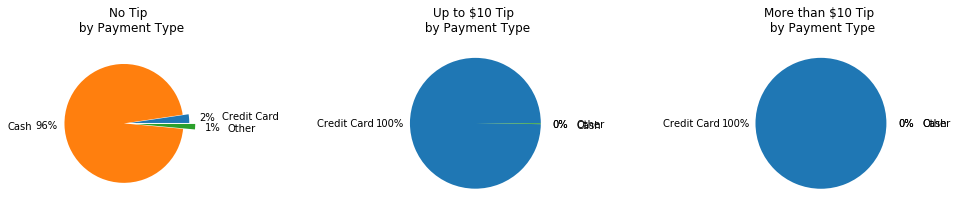

In [27]:
fig = plt.figure(figsize=[4, 4])
a = data_visual[data_visual['Tips'] == 0]['Payment Type_Credit Card'].mean()
b = data_visual[data_visual['Tips'] == 0]['Payment Type_Cash'].mean()
c = data_visual[data_visual['Tips'] == 0]["Payment Type_other"].mean()

plt1 = fig.add_axes([0, 0, .5, .5], aspect=1)

label = ['Credit Card', 'Cash', "Other"]
explode = (0.1, 0, 0.2)
plt1.pie([a, b, c], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.3, labeldistance=1.55)
plt1.set_title('No Tip \n by Payment Type', pad=20)
plt1.axis('equal')



d = data_visual[data_visual['Tips'] == 1]['Payment Type_Credit Card'].mean()
e = data_visual[data_visual['Tips'] == 1]['Payment Type_Cash'].mean()
f = data_visual[data_visual['Tips'] == 1]["Payment Type_other"].mean()

plt2 = fig.add_axes([1.2, 0, .5, .5], aspect=1)

label = ['Credit Card', 'Cash', "Other"]
explode = (0.0, 0.0, 0)
plt2.pie([d, e, f], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.3, labeldistance=1.55)
plt2.set_title('Up to $10 Tip \n by Payment Type', pad=20)
plt2.axis('equal')

g = data_visual[data_visual['Tips'] == 2]['Payment Type_Credit Card'].mean()
h = data_visual[data_visual['Tips'] == 2]['Payment Type_Cash'].mean()
i = data_visual[data_visual['Tips'] == 2]["Payment Type_other"].mean()

plt3 = fig.add_axes([2.4, 0, .5, .5], aspect=1)

label = ['Credit Card', 'Cash', "Other"]
explode = (0, 0, 0)
plt3.pie([g, h, i], labels= label , explode=explode, autopct='%1.0f%%',pctdistance=1.3, labeldistance=1.55)
plt3.set_title('More than $10 Tip \n by Payment Type', pad=20)
plt3.axis('equal')
fig.savefig("p3.png", bbox_inches='tight')

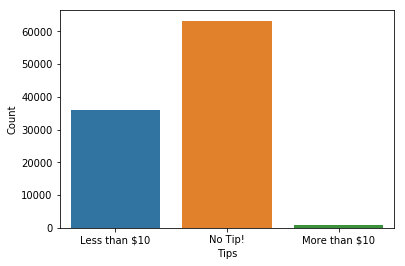

In [28]:
# Plot vertical bar chart with counts
data_visual2 = data_visual.copy()
data_visual2['Tips'][data_visual2['Tips'] == 0] = "No Tip!"
data_visual2['Tips'][data_visual2['Tips'] == 1] = "Less than $10"
data_visual2['Tips'][data_visual2['Tips'] == 2] = "More than $10"
ax = sns.countplot(x = "Tips", data = data_visual2)
ax.set(ylabel = 'Count')
ax.figure.savefig("bc1.png", bbox_inches='tight')

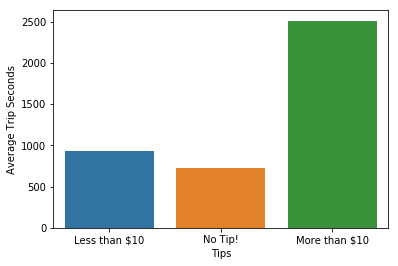

In [29]:
# Plot vertical bar chart
ax = sns.barplot(x = "Tips", y = 'Trip Seconds', data = data_visual2, ci = None)
ax.set(ylabel = 'Average Trip Seconds')
ax.figure.savefig("bc2.png", bbox_inches='tight')

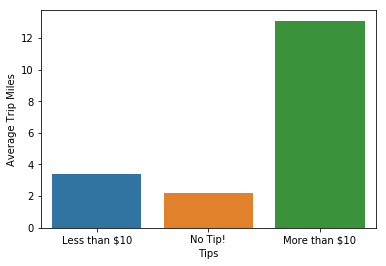

In [30]:
# Plot vertical bar chart
ax = sns.barplot(x = "Tips", y = 'Trip Miles', data = data_visual2, ci = None)
ax.set(ylabel = 'Average Trip Miles')
ax.figure.savefig("bc3.png", bbox_inches='tight')

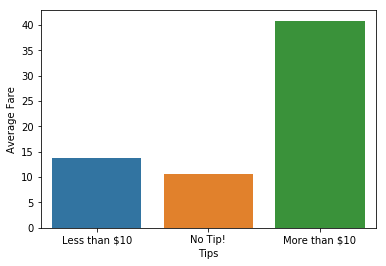

In [31]:
# Plot vertical bar chart
ax = sns.barplot(x = "Tips", y = 'Fare', data = data_visual2, ci = None)
ax.set(ylabel = 'Average Fare')
ax.figure.savefig("bc4.png", bbox_inches='tight')

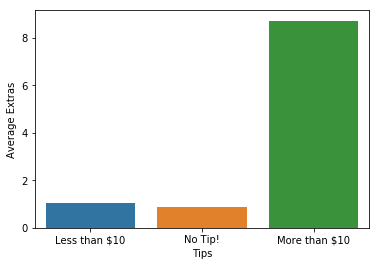

In [32]:
# Plot vertical bar chart
ax = sns.barplot(x = "Tips", y = 'Extras', data = data_visual2, ci = None)
ax.set(ylabel = 'Average Extras')
ax.figure.savefig("bc5.png", bbox_inches='tight')

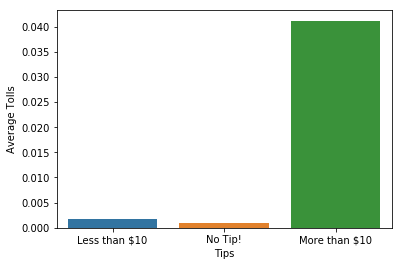

In [33]:
# Plot vertical bar chart
ax = sns.barplot(x = "Tips", y = 'Tolls', data = data_visual2, ci = None)
ax.set(ylabel = 'Average Tolls')
ax.figure.savefig("bc6.png", bbox_inches='tight')

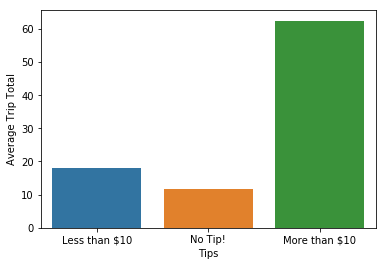

In [34]:
# Plot vertical bar chart
ax = sns.barplot(x = "Tips", y = 'Trip Total', data = data_visual2, ci = None)
ax.set(ylabel = 'Average Trip Total')
ax.figure.savefig("bc7.png", bbox_inches='tight')

# Data Modeling

In [35]:
# Split training and test data 
X = data_regression.drop(['Tips','Trip Total'], axis=1)
y = data_regression['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

#print("x_test--------------------------")
#print(x_test)

In [36]:
# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]


In [37]:
# Build Linear Regression Model
model = linear_model.LinearRegression()
x_train_reshape = numpy.reshape(x_train_scaled[:, [0,1,2,3,4,20,21,22,23,24,25,26,27,28,29,30]], (-1,16))

fitted_model = model.fit(X = x_train_reshape, y = y_train)
#print(fitted_model.coef_)

# Prediction
x_test_reshape = numpy.reshape(x_test_scaled [:, [0,1,2,3,4,20,21,22,23,24,25,26,27,28,29,30]], (-1,16))
predicted = fitted_model.predict(x_test_reshape)

#compute coefficient of determination(R^2) 
corr_coef = numpy.corrcoef(predicted, y_test)[1, 0]
R_squared = corr_coef ** 2
rms = sqrt(mean_squared_error(y_test, predicted))
print("R^2 for Tip: ", R_squared, "RMSE for Tip: ", rms)

#Check predicted tips (add column)
#y_test['Predicted Tip'] = predicted
#print(y_test)
#print(predicted)

R^2 for Tip:  0.6363230797714582 RMSE for Tip:  1.3913986929662105


In [38]:
# Build Linear Regression Model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled, y = y_train)
#print(fitted_model.coef_)

# Prediction
predicted = fitted_model.predict(x_test_scaled)

#compute coefficient of determination(R^2) 
corr_coef = numpy.corrcoef(predicted, y_test)[1, 0]
R_squared = corr_coef ** 2
rms = sqrt(mean_squared_error(y_test, predicted))
print("R^2 for Tip: ", R_squared, "RMSE for Tip: ", rms)

#Check predicted tips (add column)
#y_test['Predicted Tip'] = predicted
#print(y_test)
#print(predicted)

R^2 for Tip:  0.642299593824459 RMSE for Tip:  1.3799399380017106


In [39]:
# Build Linear Regression Model
model = linear_model.LinearRegression()
x_train_reshape = numpy.reshape(x_train_scaled[:, [0,1,2,3,4,5,7,8,10,
                                                   11,12,14,15,16,19,20,21,33]], (-1,18))

fitted_model = model.fit(X = x_train_reshape, y = y_train)
#print(fitted_model.coef_)

# Prediction
x_test_reshape = numpy.reshape(x_test_scaled[:, [0,1,2,3,4,5,7,8,10,
                                                   11,12,14,15,16,19,20,21,33]], (-1,18))
predicted = fitted_model.predict(x_test_reshape)

#compute coefficient of determination(R^2) 
corr_coef = numpy.corrcoef(predicted, y_test)[1, 0]
R_squared = corr_coef ** 2
rms = sqrt(mean_squared_error(y_test, predicted))
print("R^2 for Tip: ", R_squared, "RMSE for Tip: ", rms)

#Check predicted tips (add column)
#y_test['Predicted Tip'] = predicted
#print(y_test)
#print(predicted)



R^2 for Tip:  0.6415028758534852 RMSE for Tip:  1.381470287259169


[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]
[( 1, 86, 21,  0.24092701, 1.00160276, 80000, 8.0000e+04)
 ( 2,  3, 22,  4.97294521, 0.01449685, 49369, 4.9369e+04)
 (-1, -1, -2, -2.        , 0.        , 48584, 4.8584e+04) ...
 (-1, -1, -2, -2.        , 0.        ,     1, 1.0000e+00)
 (-1, -1, -2, -2.        , 0.        ,     7, 7.0000e+00)
 (-1, -1, -2, -2.        , 0.        ,     2, 2.0000e+00)]
ACCURACY:  0.96055 
ERROR:  0.039449999999999985 
PRECISION:  [0.97369657 0.95147142 0.30379747] 
RECALL:  [0.97806086 0.94003355 0.37209302] 
F1 SCORE:  [

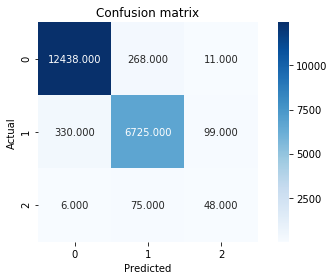

In [40]:
X = data_classification.drop(['Tips','Trip Total'], axis=1)
y = data_classification['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

#classifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train_scaled, y_train)


# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])
#plot
y_pred = classifier.predict(x_test_scaled)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


#evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("ACCURACY: ", accuracy,"\nERROR: ", error,"\nPRECISION: ", precision, "\nRECALL: ", recall,"\nF1 SCORE: ", F1_score)

[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]
[( 1, 172, 16,  0.24092701, 1.00160276, 80000, 8.0000e+04)
 ( 2, 171, 15, -0.21971899, 0.01449685, 49369, 4.9369e+04)
 ( 3, 134,  2, -0.41674185, 0.41197797,   785, 7.8500e+02) ...
 (-1,  -1, -2, -2.        , 0.        ,     3, 3.0000e+00)
 (-1,  -1, -2, -2.        , 0.        ,     2, 2.0000e+00)
 (-1,  -1, -2, -2.        , 0.        ,     1, 1.0000e+00)]
ACCURACY:  0.96015 
ERROR:  0.03985000000000005 
PRECISION:  [0.97526308 0.94876847 0.26708075] 
RECALL:  [0.9765668  0.94227006 0.33333333] 
F1 SCOR

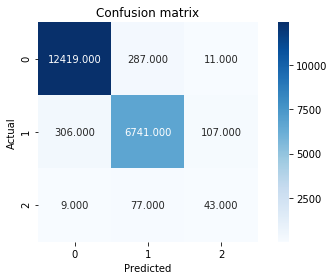

In [41]:
X = data_classification.drop(['Tips','Trip Total'], axis=1)
y = data_classification['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

#classifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
x_train_reshape = numpy.reshape(x_train_scaled[:, [0,1,2,3,4,5,7,8,10,
                                                   11,12,14,15,16,19,20,21,31,33]], (-1,19))
classifier.fit(x_train_reshape, y_train)


# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])
#plot
x_test_reshape = numpy.reshape(x_test_scaled[:, [0,1,2,3,4,5,7,8,10,
                                                   11,12,14,15,16,19,20,21,31,33]], (-1,19))
y_pred = classifier.predict(x_test_reshape)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


#evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("ACCURACY: ", accuracy,"\nERROR: ", error,"\nPRECISION: ", precision, "\nRECALL: ", recall,"\nF1 SCORE: ", F1_score)

[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]
ACCURACY:  0.9779 
ERROR:  0.02210000000000001 
PRECISION:  [0.99911476 0.9430948  0.        ] 
RECALL:  [0.97625226 0.9984624  0.        ] 
F1 SCORE:  [0.98755121 0.96998914 0.        ]


C:\Users\Hamed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Hamed\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



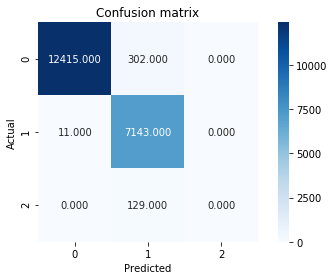

In [42]:
X = data_classification.drop(['Tips','Trip Total'], axis=1)
y = data_classification['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

#classifier
classifier = SVC(kernel='linear')  
classifier.fit(x_train_scaled, y_train)

y_pred = classifier.predict(x_test_scaled)

#plot
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


#evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("ACCURACY: ", accuracy,"\nERROR: ", error,"\nPRECISION: ", precision, "\nRECALL: ", recall,"\nF1 SCORE: ", F1_score)

[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]
ACCURACY:  0.97765 
ERROR:  0.02234999999999998 
PRECISION:  [0.99887306 0.9451074  0.45714286] 
RECALL:  [0.97578045 0.99636567 0.12403101] 
F1 SCORE:  [0.98719173 0.97005988 0.19512195]


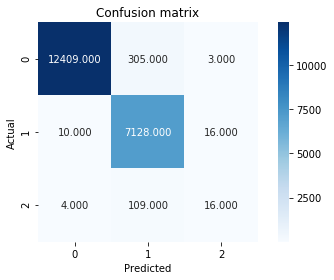

In [43]:
X = data_classification.drop(['Tips','Trip Total'], axis=1)
y = data_classification['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

#classifier
classifier = SVC(kernel='rbf')  
classifier.fit(x_train_scaled, y_train)

y_pred = classifier.predict(x_test_scaled)

#plot
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


#evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("ACCURACY: ", accuracy,"\nERROR: ", error,"\nPRECISION: ", precision, "\nRECALL: ", recall,"\nF1 SCORE: ", F1_score)

[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]
ACCURACY:  0.97785 
ERROR:  0.022150000000000003 
PRECISION:  [0.99863289 0.94620085 0.43243243] 
RECALL:  [0.97648817 0.99566676 0.12403101] 
F1 SCORE:  [0.98743639 0.97030377 0.19277108]


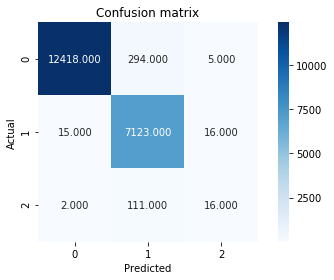

In [44]:
X = data_classification.drop(['Tips','Trip Total'], axis=1)
y = data_classification['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

#classifier
classifier = SVC(kernel='rbf') 
x_train_reshape = numpy.reshape(x_train_scaled[:, [0,1,2,3,4,5,7,8,10,
                                                   11,12,14,15,16,19,20,21,31,33]], (-1,19))
classifier.fit(x_train_reshape, y_train)
x_test_reshape = numpy.reshape(x_test_scaled[:, [0,1,2,3,4,5,7,8,10,
                                                   11,12,14,15,16,19,20,21,31,33]], (-1,19))
y_pred = classifier.predict(x_test_reshape)

#plot
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

#evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("ACCURACY: ", accuracy,"\nERROR: ", error,"\nPRECISION: ", precision, "\nRECALL: ", recall,"\nF1 SCORE: ", F1_score)

In [45]:
X = data_classification.drop(['Tips','Trip Total'], axis=1)
y = data_classification['Tips']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=0)

# Standardize training and test data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clfrf = RandomForestClassifier(n_estimators=5,max_depth=2,n_jobs=2)
clfrf.fit(x_train_scaled,y_train)
#y_pred = classifier.predict(x_test_scaled)

print(clfrf.score(x_train_scaled, y_train))
scores=cross_val_score(clfrf, x_train_scaled,y_train, cv=10)
print(scores.mean())


[[-0.76791114 -0.43436575 -0.69787203 ...  1.82314478 -0.55592306
  -0.59604199]
 [ 4.60569886  2.48650661  2.92773826 ... -0.54850279  1.79881008
  -0.59604199]
 [-0.44709861 -0.43436575 -0.58154229 ... -0.54850279  1.79881008
  -0.59604199]
 ...
 [-0.2064892   0.09816899 -0.11622332 ... -0.54850279 -0.55592306
   1.67773414]
 [-0.76791114 -0.36981609 -0.71726032 ... -0.54850279 -0.55592306
  -0.59604199]
 [-0.68770801 -0.32140384 -0.65909545 ...  1.82314478 -0.55592306
  -0.59604199]]
0.97705
0.8956337700269492


In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [2, 5, 10],
              "n_estimators": [10,100]}
clfrf2 = GridSearchCV(clfrf, param_grid, cv=10,scoring='accuracy',n_jobs=8)
clfrf2.fit(x_train_scaled, y_train)
print(clfrf2.best_params_)

{'max_depth': 10, 'n_estimators': 10}


In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": [2, 5, 10],
              "n_estimators": [10,100]}
clfrf2 = GridSearchCV(clfrf, param_grid, cv=10,scoring='f1_weighted',n_jobs=8)
clfrf2.fit(x_train_scaled, y_train)
print(clfrf2.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [49]:
clfrf3 = RandomForestClassifier(n_estimators=10,max_depth=10,n_jobs=2)
clfrf3.fit(x_train_scaled,y_train)
y_pred = clfrf3.predict(x_test_scaled)

ACCURACY:  0.9776 
ERROR:  0.022399999999999975 
PRECISION:  [0.99959723 0.94437086 0.36111111] 
RECALL:  [0.97578045 0.99664523 0.10077519] 
F1 SCORE:  [0.98754526 0.96980413 0.15757576]


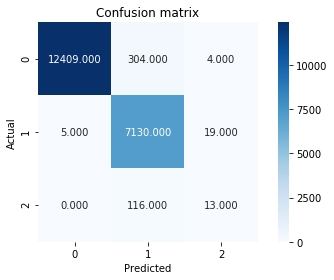

In [50]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


#evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_pred, average = None)
recall = metrics.recall_score(y_test, y_pred, average = None)
F1_score = metrics.f1_score(y_test, y_pred, average = None)
print("ACCURACY: ", accuracy,"\nERROR: ", error,"\nPRECISION: ", precision, "\nRECALL: ", recall,"\nF1 SCORE: ", F1_score)